<div style="text-align: center; margin: 50px">

<h1 style="color: white; background-color: grey; text-align: center;">Qubit by Qubit - Semester 2</h1>
<h3>Week 18 lab: Superdense Coding</h3>

</div>

# Overview 
1. [Introduction](#intro)
2. [The steps involved in superdense coding](#part1)<br>
    1.1 [Preparation](#part1a)<br>
    1.2 [Transport](#part1b)<br>
    1.3 [Encoding](#part1c)<br>
    1.4 [Transmission](#part1d)<br>
    1.5 [Decoding](#part1e)<br>
3. [Putting it all together: Complete protocol](#part2)<br>
   3.1 [Difference between superdense coding and quantum teleportation](#part2a) <br>
4. [Key Takeaways](#part3)
5. [Further Reading and Resources](#part4)
5. [Optional Content](#part5)

In [2]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram

<a id="intro"></a>
# Introduction

Suppose you wanted to send your friend the message 00110101 (maybe this is a code that you and your friend have decided means "Let's get ice-cream").

How many bits of information would you need to send? 

Superdense coding is a quantum communication protocol where you can send messages to your friend by sending only half as many qubits as classical bits, provided you and your friend share entangled qubits. 

Each qubit you send encodes 2 classical bits of information.

In this lab, we will look at each step of the superdense coding protocol, and, at the end, bring all the steps teogether to simulate the whole process. 

<a id="part1"></a>
# 1. The steps involved in superdense coding

Superdense coding is a quantum information protocol that is inherently quantum: there are no classical protocols that behave in the same way. This protocol involves two parties who wish to perform some communication task between them.

In descriptions of such communications protocols (especially in cryptography), it is very common to name the two parties 'Alice' and 'Bob', for convenience. We will follow this tradition.

In superdense coding, we communicate classical information using 2-qubit entangled states (Bell states). Recall that there are four Bell states:

$$|\phi^+\rangle = \frac{1}{\sqrt{2}}\big(|00\rangle+|11\rangle\big)$$
$$|\phi^-\rangle = \frac{1}{\sqrt{2}}\big(|00\rangle-|11\rangle\big)$$
$$|\psi^+\rangle = \frac{1}{\sqrt{2}}\big(|01\rangle+|10\rangle\big)$$
$$|\psi^-\rangle = \frac{1}{\sqrt{2}}\big(|01\rangle-|10\rangle\big)$$

These states are examples of **two-qubit entangled states**. These entangled states carry two types of information - **parity** and **phase**. **Parity** refers to whether the two qubits, when measured, would return the same value or not. We can see that for the $|\phi^+\rangle$ and $|\phi^-\rangle$ states, both qubits are either 0, or both qubits are 1. For the $|\psi^+\rangle$ and $|\psi^-\rangle$, the two qubits are opposite - if one of them is 1, the other is 0. **Phase** refers to the sign between the two superposed two-qubit states. For $|\phi^+\rangle$ and $|\psi^+\rangle$ this sign is +, whereas for $|\phi^-\rangle$ and $|\psi^-\rangle$ it is -.

**Question: How many bits of information does each Bell state carry?**

In lecture, we saw that there are 5 steps in the superdense coding protocol:

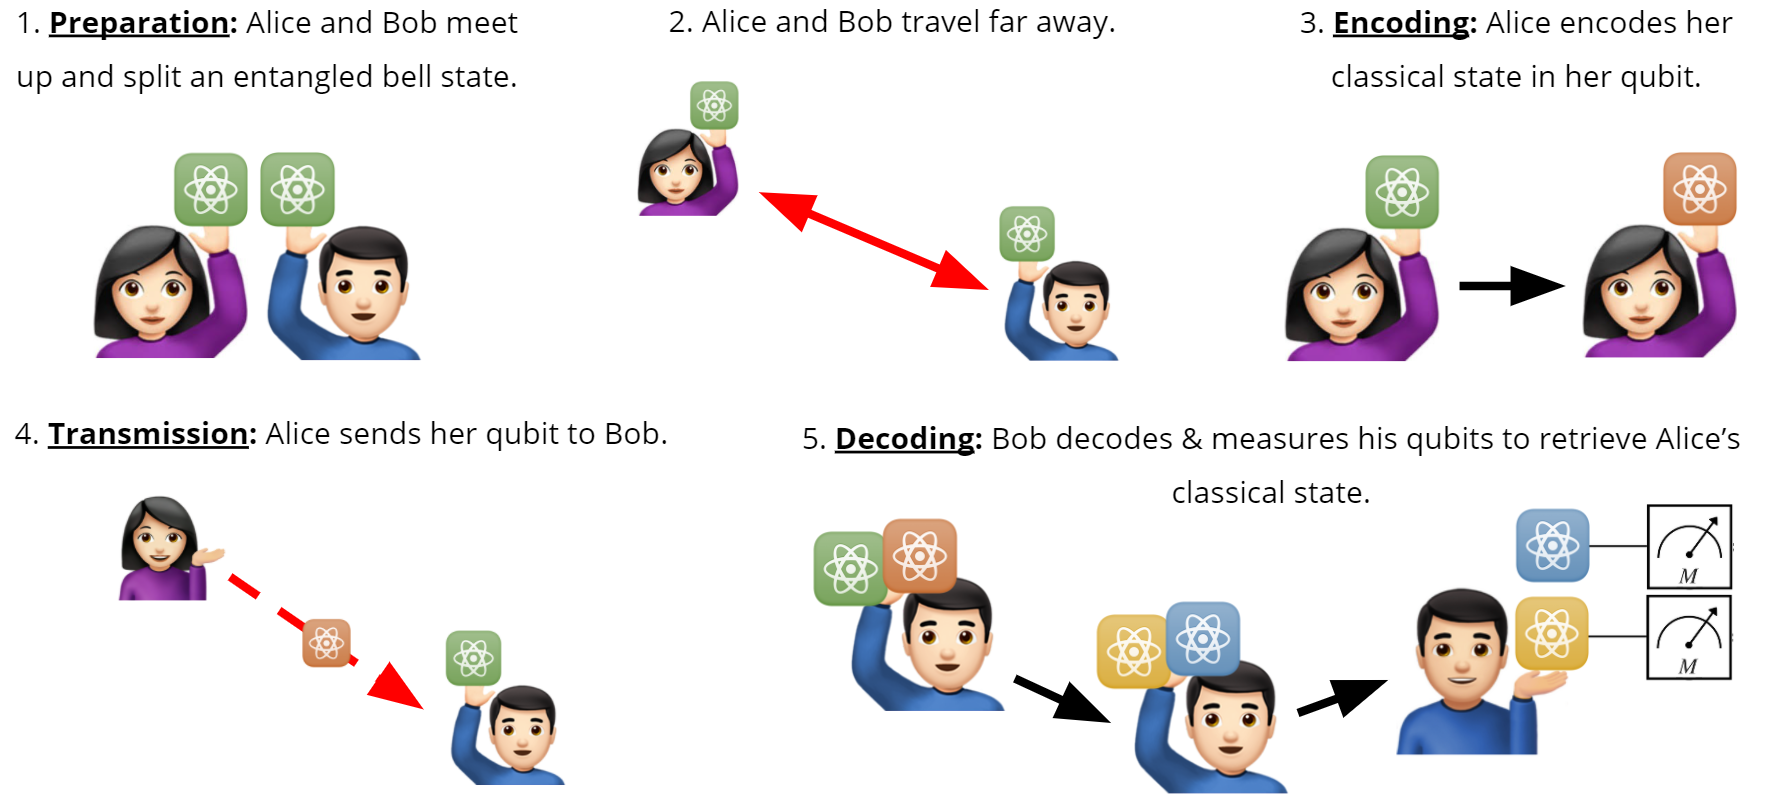

<a id="part1a"></a>
## 1. 1 State preparation: Preparing the Psi+ Bell state

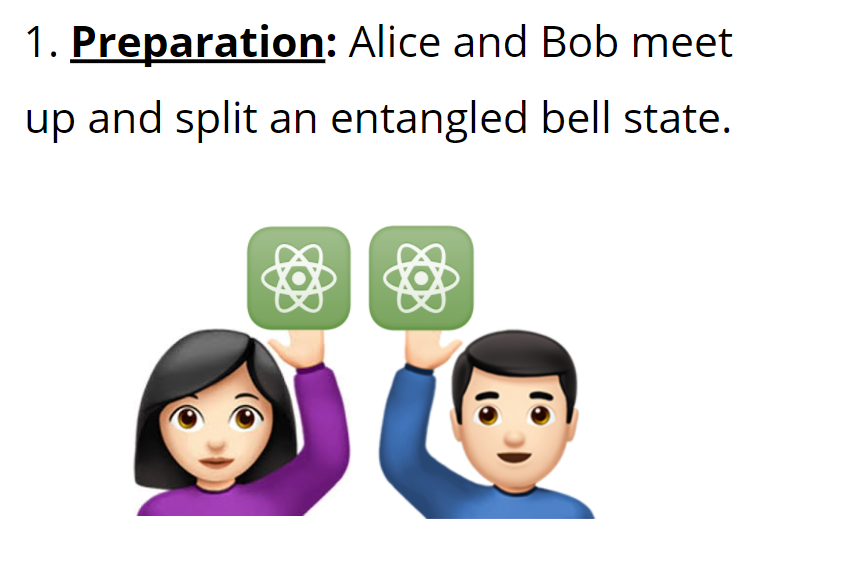

The first step in the superdense coding protocol is preparation of $|\phi^+\rangle$, the first Bell state. We have seen how this state is prepared already in labs over the past two weeks!

For preparing $|\phi^+\rangle$, we used the following circuit:

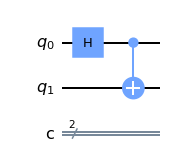

In [3]:
circ_phiplus = QuantumCircuit(2,2)
circ_phiplus.h(0)
circ_phiplus.cx(0,1)
circ_phiplus.draw('mpl')

After this state is prepared, Alice takes $q_0$, and Bob takes $q_1$. The two qubits still remain entangled - distance does not affect entanglement. As long as the qubits are not measured (or subjected to environmental noise), they stay entangled.

**Homework tip - Role of Charlie** : Often, descriptions of both superdense coding and quantum teleportation will include a third party named Charlie. Charlie's role is to prepare the $|\phi^+\rangle$ bell state, send one of the entangled qubits to Bob, and one to Alice. This is just an alternative way of describing the state preparation step. The end result is the same - Alice has one qubit from the $|\phi^+\rangle$ state, and Bob has the other.

<a id="part1b"></a>
## 1.2 Alice and Bob travel far away

Not much to code here! After sharing the entangled qubits, Alice and Bob return back to their respective homes.

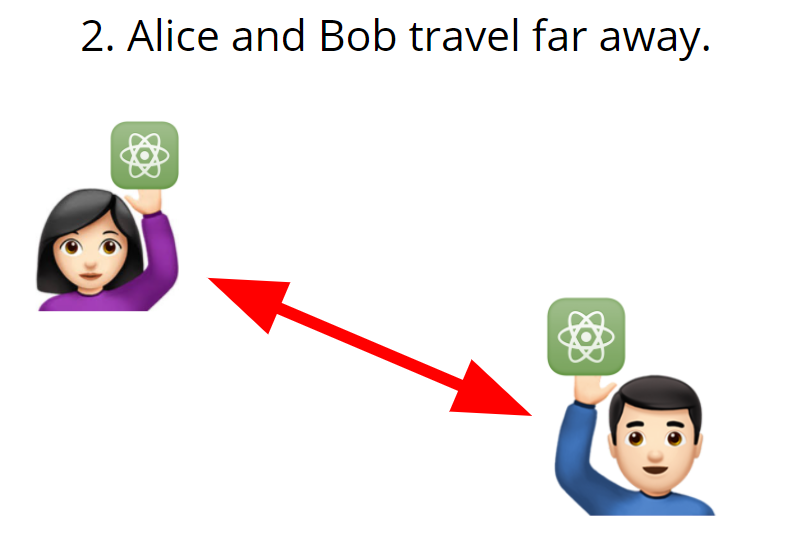

<a id="part1c"></a>
## 1.3 Encoding

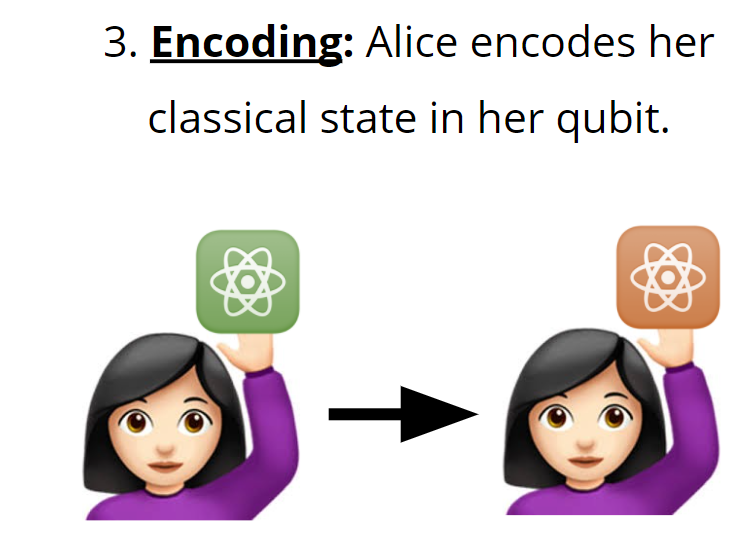

In this step, Alice encodes the 2 classical bits she wants to send onto her qubit. How does she do this?

Remember that the goal is to send 1 of 4 possible classical messages. We have 4 Bell states! So, if Alice can manipulate her qubit to prepare each of the 4 states, she can encode her 2 bit message!

Let's make a choice about which Bell state encodes which message. Here is the conventional choice:
$$|\phi^+\rangle = 00$$
$$|\phi^-\rangle = 01$$
$$|\psi^+\rangle = 10$$
$$|\psi^-\rangle = 11$$

So, to send the message 00, Alice will want to prepare the $|\phi^+\rangle$ state, to send 11, she will prepare the $|\psi^-\rangle$ state, and so on.

**Note**: The encoding for $|\phi^-\rangle$ and $|\psi^+\rangle$ is flipped here, compared to lecture, because we are using right indexing. The lectures had left indexing. Also, in lectures, these bits were represented as $b_1$ and $b_2$

The current 2-qubit state shared by Alice and Bob is $|\phi^+\rangle$. So, if Alice wants to send 00, she doesn't need to do anything more!

If she wants to send any of the other messages, she has to prepare the other 3 Bell states. We've already seen how to prepare $|\phi^-\rangle$ last week. This week, we'll see how to prepare the $|\psi^+\rangle$, and we'll also look at $|\psi^-\rangle$ in the optional content.

For $|\phi^-\rangle$, we used the following circuit:

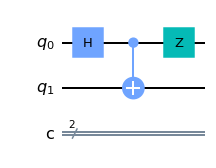

In [35]:
circ_phiminus = QuantumCircuit(2,2)
circ_phiminus.h(0)
circ_phiminus.cx(0,1)
circ_phiminus.z(0)
circ_phiminus.draw('mpl')

Here, the Z gate changes the state of $q_0$ from $\frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$ to $\frac{1}{\sqrt{2}}(|0\rangle - |1\rangle)$, ensuring the right sign for the $|\phi^-\rangle$ state. Note that here, we've shifted the Z gate to after the CNOT. This is okay, because the CNOT only affects $q_1$, not $q_0$.

Now, let's try to make the state $|\psi^+\rangle = \frac{1}{\sqrt{2}}\big(|01\rangle+|10\rangle\big)$. What is the difference between the $|\psi^+\rangle$ and $|\phi^+\rangle$ states?

One way to look at the difference between these states is to observe that $q_0$ is flipped in $|\psi^+\rangle$ compared to $|\phi^+\rangle$. Which single qubit gate could we use to do this flipping?

We can use the X gate! Here's the circuit:

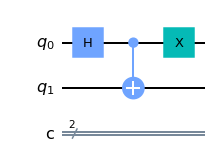

In [57]:
circ_psiplus = QuantumCircuit(2,2)
circ_psiplus.h(0)
circ_psiplus.cx(0,1)
circ_psiplus.x(0)
circ_psiplus.draw('mpl')

Let's run our circuit on the qasm simulator! First, we'll need to add measurements:

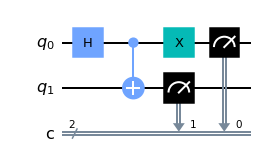

In [58]:
circ_psiplus.measure([0,1],[0,1])
circ_psiplus.draw('mpl')

And now, let's run our circuit!

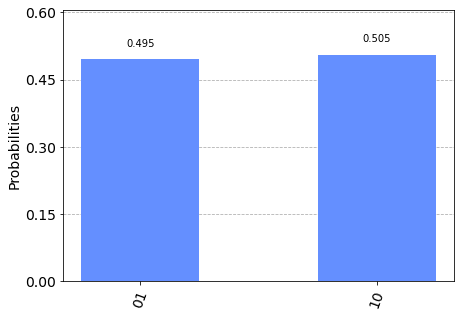

In [59]:
backend = Aer.get_backend('qasm_simulator')  # specifying that we will use qasm simulator
job = execute(circ_psiplus, backend, shots = 1024)  # shots=1024 specifies that the circuit will be run 1024 times
result = job.result()
# getting the counts, i.e., the fraction of times the circuit gave all the possible results
counts = result.get_counts(circ_psiplus)  
graph = plot_histogram(counts)
display(graph)

It works! We get 01 and 10 as the two possible outputs. Can you verify that this state has the right sign?

We'll leave the preparation of the last bell state, $|\psi^-\rangle$, to the optional content - there, we will combine both the Z and the X gates.

To summarize, here are the gates Alice applies for each of the 4 Bell states:


| Intended Message | Gate Alice Applies | Resulting State |
|:----------------:|:--------------------------:|:---------------:|
| 00 | $$I$$ (she does nothing) | $$\tfrac{1}{\sqrt{2}}\big(|00\rangle+|11\rangle\big)=|\Phi^+\rangle$$ |
| 10 | $$X$$ | $$\tfrac{1}{\sqrt{2}}\big(|01\rangle+|10\rangle\big)=|\Psi^+\rangle$$ |
| 01 | $$Z$$ | $$\tfrac{1}{\sqrt{2}}\big(|00\rangle-|11\rangle\big)=|\Phi^-\rangle$$ |
| 11 | $$X\cdot Z$$ | $$\tfrac{1}{\sqrt{2}}\big(-|01\rangle+|10\rangle\big)=-|\Psi^-\rangle$$ |

Alice's qubit is the first from right (remember we are using right indexing) and Bob's is the second. So in this step 2, Alice applies the gate according to the table above, while Bob leaves his qubit (the second) in the same state.

Thus if she wants to send $00$, she does nothing to her qubit (apply the identity ($I$) gate). If she wants to send $10$, she applies the $X$ gate to her qubit, and so on for the other bit combinations. Depending on what she wants to send, she applies the appropriate gate, then sends her qubit to Bob for the final step in the process.

<a id="part1b"></a>
### Creating a function to prepare a desired bell state

It is a bit annoying to have to create the circuit from scratch everytime we want to create one of the four Bell states. Let's make our lives easier - we'll write a function that will make any one of the four states for us, depending on an input parameter.

One observation from the four circuits we just made is that they have some gates in common - all circuits begin with an H gate followed by a CNOT gate. For the $|\phi^+\rangle$ state this is all we needed to do. For the other states, we had to apply additional gates. 

Therefore, we'll define two functions: One that creates the "common" parts of all four circuits, and a second that adds the extra gates needed for each of the four Bell states. We'll call the function that creates the common parts `create_bell_pair`, and it will take the quantum circuit we're working with as an input parameter.

This function implements step 1 - preparation, because it will prepare the $|\phi^+\rangle$ state.

In [6]:
# Define a function that takes a QuantumCircuit (qc) and adds the common gates for all Bell states

def create_bell_pair(qc):
    qc.h(0)     # Apply a h-gate to the first qubit
    qc.cx(0,1)  # Apply a CNOT, using the first qubit as the control

Next, we'll create the function that adds the extra gates to create a specific Bell states. Let's call this function `specify_state`. This function will have two inputs - the quantum circuit we're working with, and a string specifying which of the four states we want to create (or, equivalently, the message Alice wants to send). Recall that we are using the following encoding for the states:
$$|\phi^+\rangle = 00$$
$$|\phi^-\rangle = 01$$
$$|\psi^+\rangle = 10$$
$$|\psi^-\rangle = 11$$
Note that **these are not the results of measuring these states (yet) - this is just a way to encode each of these four states**.

In [29]:
# Define a function that takes the quantum circuit and the encoding for a specific Bell state as input,
# and adds the specific gates for that state
def specify_state(qc, msg):
    if msg == "00":
        pass             # To send '00' we do nothing (same as apply I-gate)
    elif msg == "01":
        qc.z(0)     # To send '01' we apply a Z-gate
    elif msg == "10":
        qc.x(0)      # To send '10' we apply an X-gate
    elif msg == "11":
        qc.x(0)      # To send '11' we apply a Z-gate
        qc.z(0)      # followed by an X-gate
    else:
        print("Invalid Message: Sending '00'")

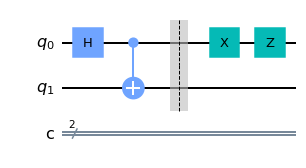

In [30]:
# Let's test out our functions!

qc_test = QuantumCircuit(2,2)

create_bell_pair(qc_test)  # First, creae the common parts of the circuit  - this is step 1: preparation

qc_test.barrier() # Adding a barrier between the 'common' part of the circuit and the part specific to the Bell state
#Note that barriers are just a visual aid to separate different parts of the circuit - they do not do anything else
#You can think of this barrier as step 2: travel

specify_state(qc_test,'11')  # We choose to create the psi+ state - this is step 3: encoding

qc_test.draw('mpl')

<a id="part1d"></a>
## 1.4 Transmission

Again, not much to code here. After encoding her 2 qubit message, Alice transmits her qubit to Bob. For example, if the qubits are photons, she could transmit her photon on an optical fibre. 

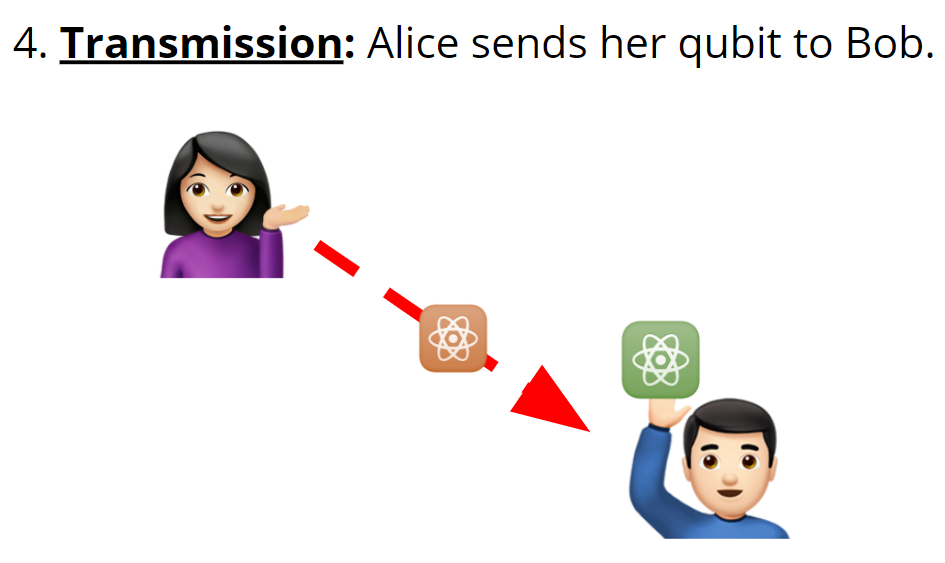

<a id="part1e"></a>
## 1.5 Decoding with Bell measurements

This is the final step of superdense coding. Having received Alice's qubit, Bob now has to decode her message. How can he do this?

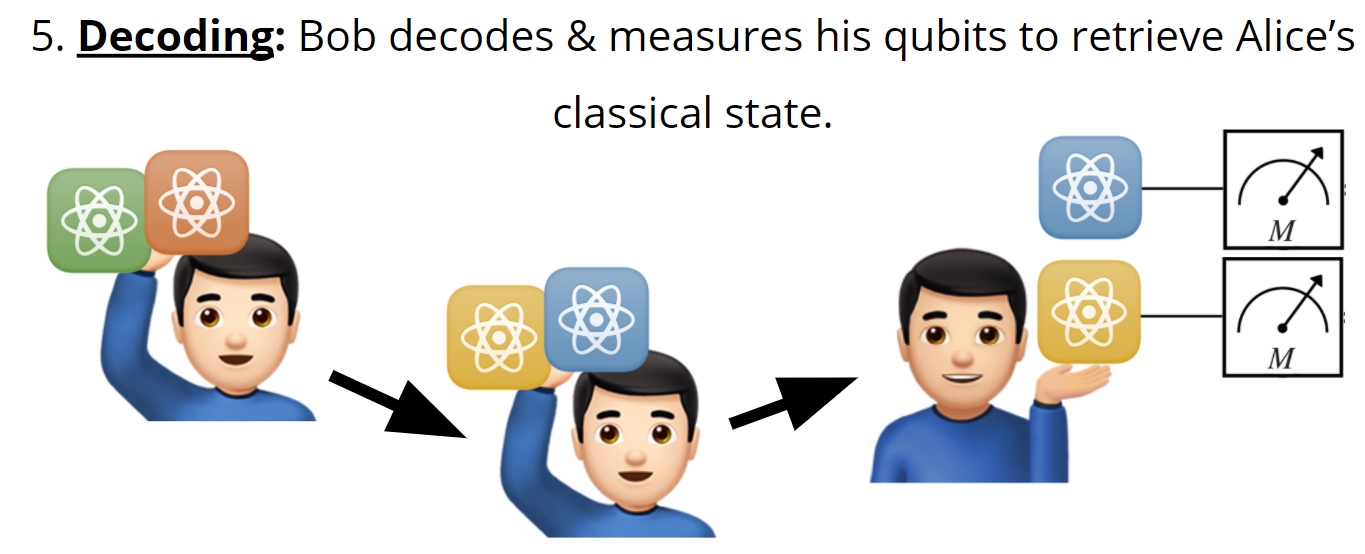

Bob needs a way to tell the four Bell states apart with 100% probability. If he can find a way to do this, he can successfully decode Alice's message.

A simple measurement of the 2 qubits is not going to be enough. We have seen last week that, for example, both the $|\phi^+\rangle$ and $|\phi^-\rangle$ states give outputs 00 and 11 with probability 50/50. Could we measure the Bell states differently so that we can tell these states apart?

Let's think back to what these four states have in common, and what is different between them. 

When we prepared the states, there was a common part - we first applied an H gate, and then a CNOT gate. Next came the gates that differentiated the four states. If we could somehow "remove" the effects of the common part, maybe we can tell the four states apart!

This is the motivation behind **Bell basis measurements**. By undoing the "common" part of the circuit (CNOT and H gates) in which the Bell states were prepared, we can deterministically tell the four Bell states apart.

For more details about the math behind this idea, refer to the lecture slides/recording. Here, we'll focus on the intuition of reversing the common part of the circuit to tell apart the 4 Bell states.

### Bell measurement circuit

The Bell measurement circuit 'undoes' the common part of the Bell state preparation circuit. It first applies a CNOT gate, and then an H gate, to the 2-qubit state. This is exactly the reverse of the order in which we had applied these gates earier.

Let's define a function `bell_measure` to make Bell measurements for us.

In [31]:
def bell_measure(qc):
    qc.cx(0,1)
    qc.h(0)
    qc.measure([0,1],[0,1])

We will test out our Bell measurement circuit very soon. Here is what Bob expects to get after this measurement (remember that Bob's qubit is the second from the right):


| Bob Receives | After CNOT gate | After H gate | Classical bits after measurement
|:------------:|:----------------:|:------------:|:------------:|
| $$|00\rangle+|11\rangle$$ | $$|00\rangle+|01\rangle$$ | $$|00\rangle$$ | 00 |
| $$|01\rangle+|10\rangle$$ | $$|11\rangle+|10\rangle$$ | $$|10\rangle$$ | 10 |
| $$|00\rangle-|11\rangle$$ | $$|00\rangle-|01\rangle$$ | $$|01\rangle$$ | 01 |
| $$-|01\rangle+|10\rangle$$ | $$-|11\rangle+|10\rangle$$ | $$-|11\rangle$$ | 11 |



<a id="part2"></a>
# 2 Putting it all together: Superdense coding protocol

Finally, we can put our functions together to complete our protocol and simulate it.

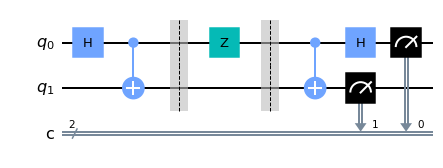

In [32]:
# Create the quantum circuit with 2 qubits
qc = QuantumCircuit(2,2)


# Step 1 : Preparation
create_bell_pair(qc)

qc.barrier() # This adds a barrier to our circuit. A barrier separates the gates in our diagram and makes it 
             # clear which part of the circuit is which. Think of this as step 2: travel. 
             # At this point, qubit 0 goes to Alice and qubit 1 goes to Bob


# Step 3: Encoding. Alice encodes her message onto qubit 0. In this case, we want to send the message '01'.
# You can try changing this value and see how it affects the circuit
message = "01"
specify_state(qc, message)


qc.barrier() # Another barrier. Think of this as step 4: Alice sends her qubit to Bob.


# Step 5: Decoding. After recieving qubit 0, Bob applies the decoding protocol.
bell_measure(qc) # Bob implements a Bell measurement to decode Alice's message

# Draw our output
qc.draw(output = "mpl")


Let's see if Bob receives the correct message!

{'01': 1024}


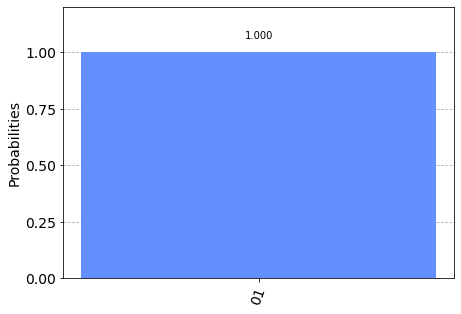

In [28]:
backend = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend, shots=1024)
sim_result = job_sim.result()


measurement_result = sim_result.get_counts(qc)
print(measurement_result)
plot_histogram(measurement_result)


Bob decodes the message successfully every time! The Bell measurement works, and Bob gets Alice's measurement. Try out the circuit with the other messages!

<a id="part2a"></a>
## The Difference between Superdense Coding and Quantum Teleportation

Quantum teleportation and superdense coding are closely related, to avoid confusion we need to clarify the difference.

Quantum teleportation is a process by which the state of qubit ($|\psi\rangle$) can be transmitted from one location to another, using two bits of classical communication and a Bell pair. In other words, we can say it is a protocol that destroys the quantum state of a qubit in one location and recreates it on a qubit at a distant location, with the help of shared entanglement. Superdense coding is a procedure that allows someone to send two classical bits to another party using just a single qubit of communication.


| Protocol | What it does |
|:--------:|:------------:|
| Superdense Coding | Transmit two classical bits using one qubit |
| Teleportation | Transmit one qubit using two classical bits |


The teleportation protocol can be thought of as a flipped version of the superdense coding protocol, in the sense that Alice and Bob merely “swap their equipment.”

<a id="part3"></a>
# Key Takeaways

1. Superdense coding allows Alice to send Bob a classical message consisting of 2 bits by transferring only 1 qubit. A prerequisite for superdense coding is that Alice and Bob share a 2-qubit entangled state.

2. In superdense coding, Alice prepares one of 4 Bell states to encode her message by applying single qubit gates to her qubit. Then, she sends her qubit to Bob.

3. After receiving Alice's qubit, Bob applies a Bell measurement on both qubits to decode Alice's measurement. In this measurement, he first apples a CNOT gate and then an H gate to undo the "common" part of the state preparation circuit. Finally, he measures the 2 qubits. Bell measurements distinguish between the 4 Bell states with 100% probability.

4. Quantum teleportation can be thought of as the inverse of superdense coding.

<a id="part4"></a>
# Further Reading and Resources

[Video on Superdense Coding from Prof. Michael Nielsen](https://www.youtube.com/watch?v=w5rCn593Dig)

[Qiskit textbook page on superdense coding](https://qiskit.org/textbook/ch-algorithms/superdense-coding.html)

[Qiskit textbook page on quantum teleportation](https://qiskit.org/textbook/ch-algorithms/teleportation.html)

[Experimental demonstration of quantum teleportation](http://copilot.caltech.edu/documents/16804/nature_bouwmeester_pan_mattle_eibl_weinfurter_zeillinger_experimental_quantum_teleportation_1997.pdf)

<a id="part5"></a>
# Optional content

## Preparing the psi- state

Let's prepare the state $|\psi^-\rangle = \frac{1}{\sqrt{2}}\big(|01\rangle-|10\rangle\big)$. Can we use what we've learnt so far to prepare this state?

We have to use both the X gate to flip qubit 1, and the Z gate to flip the sign! Here's the circuit, along with its execution.

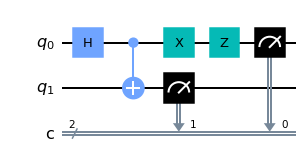

In [33]:
circ_psiminus = QuantumCircuit(2,2)
circ_psiminus.h(0)
circ_psiminus.cx(0,1)
circ_psiminus.x(0)
circ_psiminus.z(0)
circ_psiminus.measure([0,1],[0,1])
circ_psiminus.draw('mpl')

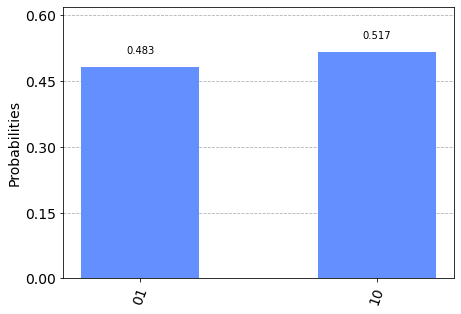

In [35]:
backend = Aer.get_backend('qasm_simulator')  # specifying that we will use qasm simulator
job = execute(circ_psiminus, backend, shots = 1024)  # shots=1024 specifies that the circuit will be run 1024 times
result = job.result()
# getting the counts, i.e., the fraction of times the circuit gave all the possible results
counts = result.get_counts(circ_psiminus)  
graph = plot_histogram(counts)
display(graph)

Again, you can check that the states have the right sign using statevector simulator.

# Extra content (strictly optional!!)

## Running your superdense coding on an actual quantum computer

We can now see this working on a real quantum computer. First, we want to load our account to get the least busy quantum system:

In [36]:
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
shots = 256

# Load local account information
IBMQ.load_account()
# Get the least busy backend
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))
print("least busy backend: ", backend)


# Run our circuit
job = execute(qc, backend=backend, shots=shots)


least busy backend:  ibmq_belem


To know the status of our job, we can monitor it:

In [ ]:
# Monitoring our job
from qiskit.tools.monitor import job_monitor
job_monitor(job)


Job Status: job is queued (85)  

When the job has finished, we can review the results:

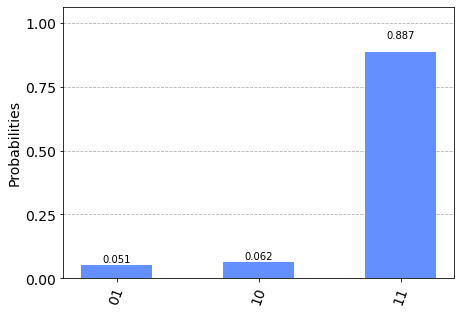

In [9]:
# Plotting our result
result = job.result()
plot_histogram(result.get_counts(qc))


As we see that there are a few results from the other three states when run in a real quantum computer. These are due to errors in the gates and qubit decoherence.

In [10]:
correct_results = result.get_counts(qc)[message]
accuracy = (correct_results/shots)*100
print("Accuracy = %.2f%%" % accuracy)


Accuracy = 88.67%
